<a href="https://colab.research.google.com/github/Sakib3602/ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

df = pd.read_csv("heart.csv")


Saving heart.csv to heart.csv


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
target_col = "HeartDisease"
numeric_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS",
                "MaxHR", "Oldpeak"]

categorical_cols = ["Sex", "ChestPainType", "RestingECG",
                    "ExerciseAngina", "ST_Slope"]

In [7]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()} ---> {df[col].nunique()}")
    print("------------")


Sex: ['M' 'F'] ---> 2
------------
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA'] ---> 4
------------
RestingECG: ['Normal' 'ST' 'LVH'] ---> 3
------------
ExerciseAngina: ['N' 'Y'] ---> 2
------------
ST_Slope: ['Up' 'Flat' 'Down'] ---> 3
------------


In [8]:

df[numeric_cols].agg(["min", "max", "median","mean"]).T

,min,max,median,mean
Age,28.0,77.0,54.0,53.510893
RestingBP,0.0,200.0,130.0,132.396514
Cholesterol,0.0,603.0,223.0,198.799564
FastingBS,0.0,1.0,0.0,0.233115
MaxHR,60.0,202.0,138.0,136.809368
Oldpeak,-2.6,6.2,0.6,0.887364


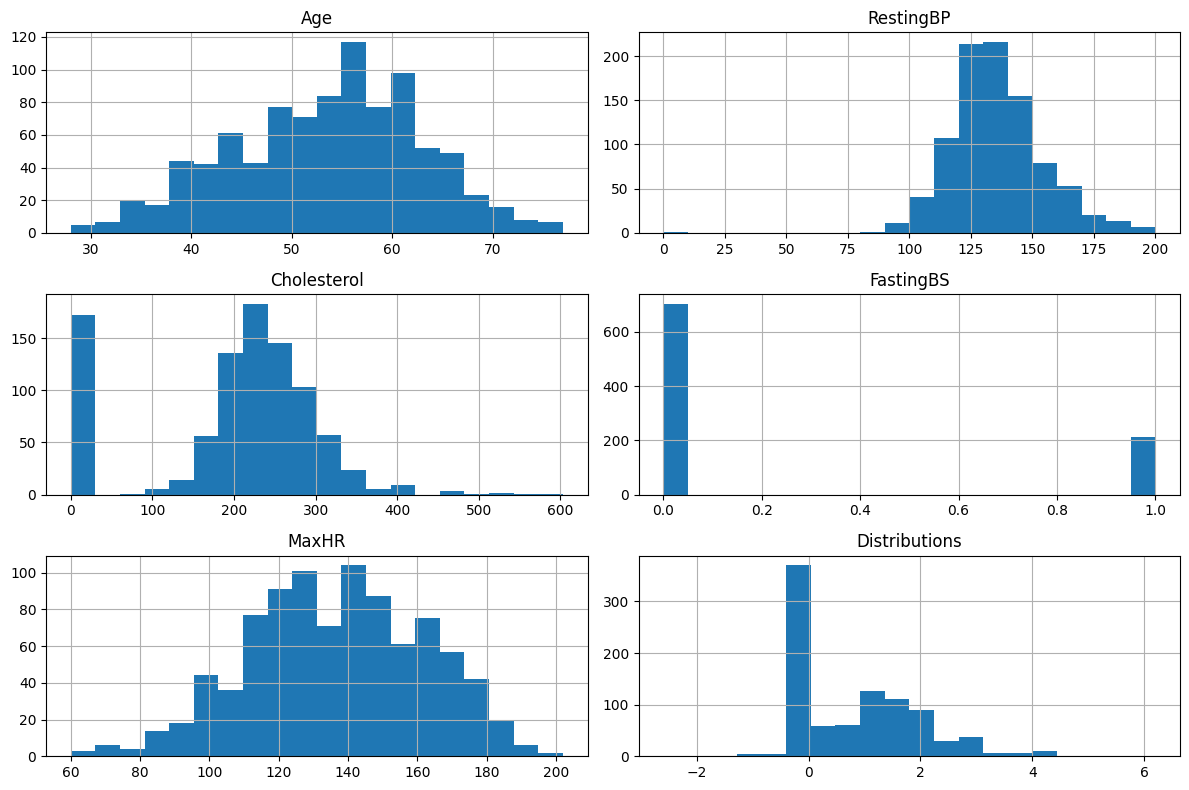

In [29]:
df[numeric_cols].hist(bins=20 , figsize=(12,8))
plt.title("Distributions")
plt.tight_layout()
plt.show()

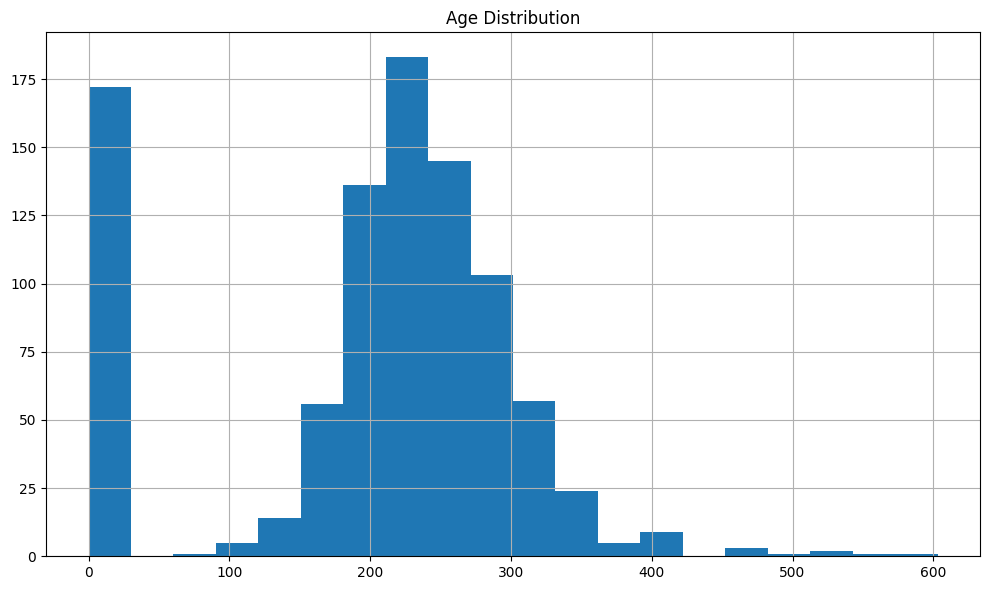

In [10]:
df["Cholesterol"].hist(bins=20, figsize=(10, 6))
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

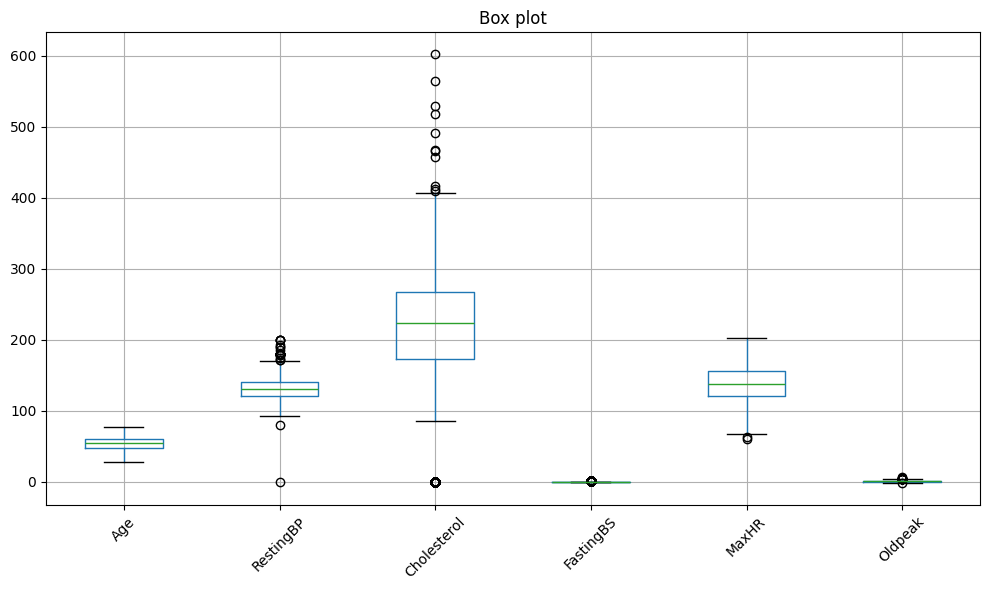

In [11]:
df[numeric_cols].boxplot(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Box plot")
plt.tight_layout()
plt.show()

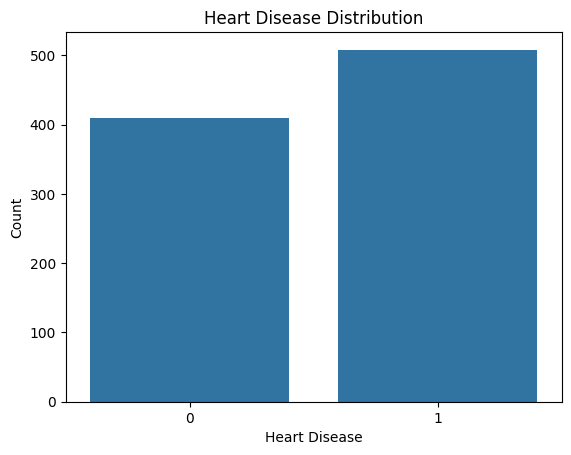

In [12]:
sns.countplot(x=df['HeartDisease'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Distribution')
plt.show()

In [13]:
df['HeartDisease'].value_counts(normalize=True)

,proportion
HeartDisease,
1,0.553377
0,0.446623


# ***Bar***

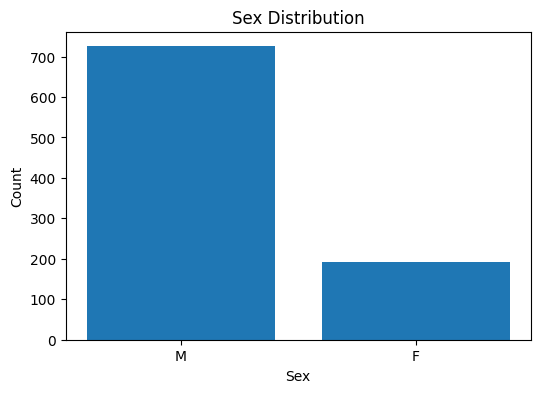

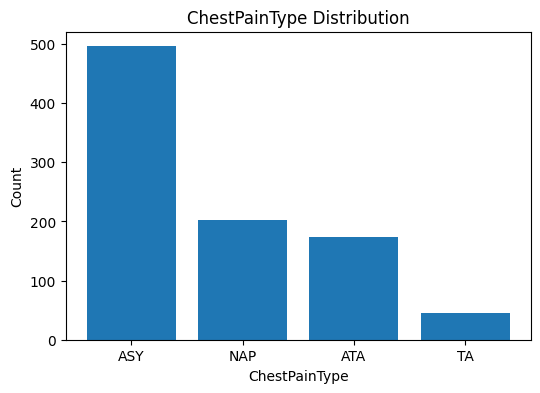

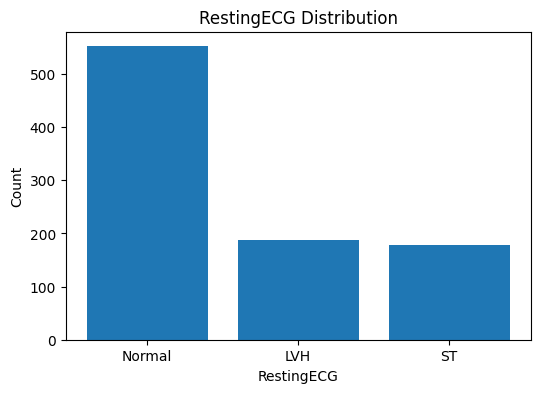

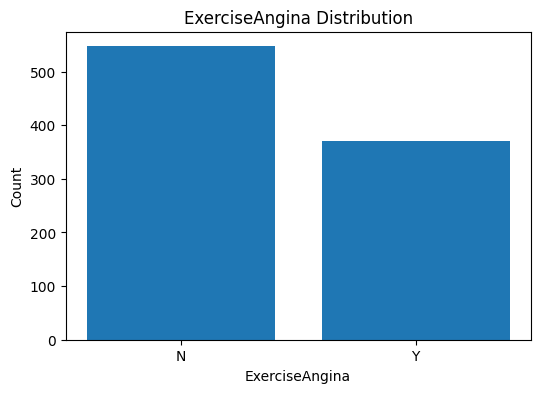

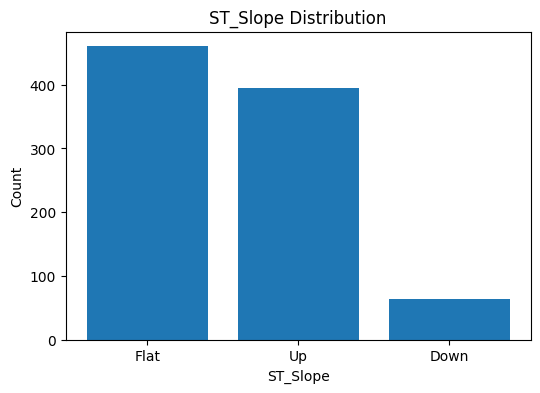

In [14]:
for c in categorical_cols:
  plt.figure(figsize=(6,4))
  plt.bar(df[c].value_counts().index,df[c].value_counts())
  plt.xlabel(c)
  plt.ylabel('Count')
  plt.title(f'{c} Distribution')
  plt.show()

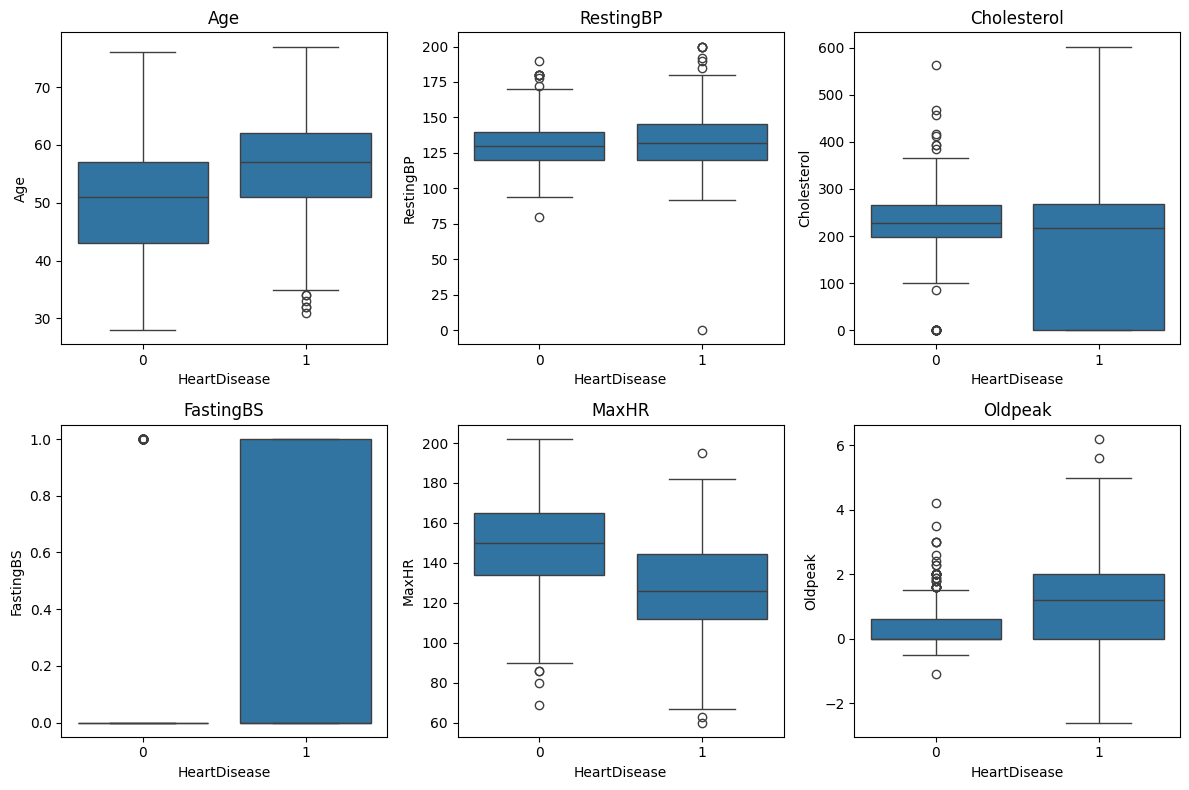

In [15]:
plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_cols,1):
  plt.subplot(2,3,i)
  sns.boxplot(x=df[target_col], y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

# ***Categorical relation with target col***

Proportion of heartD within Sex


'Sex'

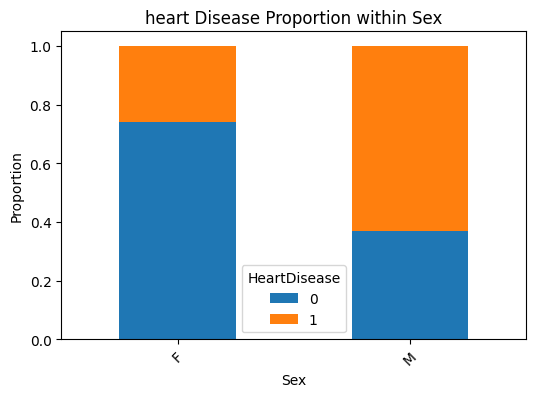

Proportion of heartD within ChestPainType


'ChestPainType'

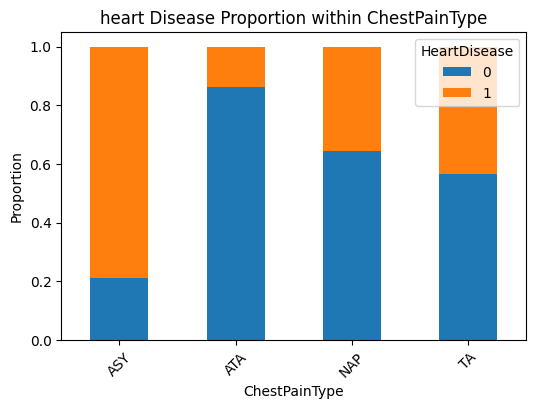

Proportion of heartD within RestingECG


'RestingECG'

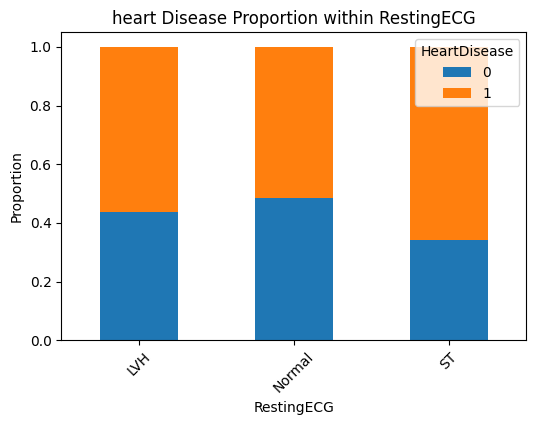

Proportion of heartD within ExerciseAngina


'ExerciseAngina'

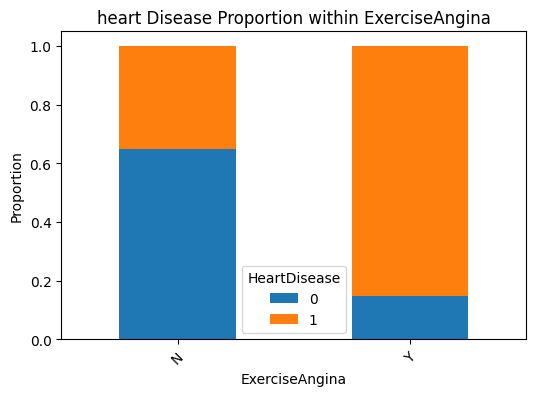

Proportion of heartD within ST_Slope


'ST_Slope'

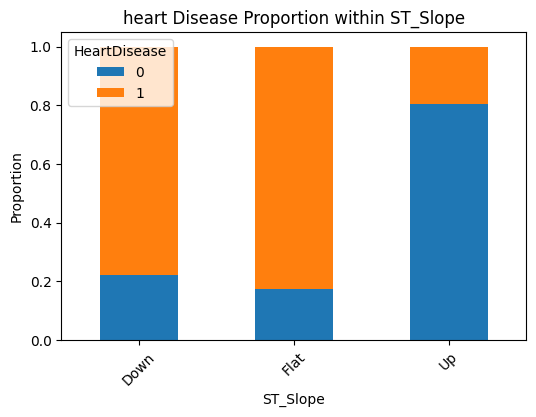

In [25]:
for c in categorical_cols:
  ct = pd.crosstab(df[c],df[target_col], normalize='index')
  print(f"Proportion of heartD within {c}")
  display(c)

  ct.plot(kind='bar',stacked=True, figsize=(6,4))
  plt.title(f"heart Disease Proportion within {c}")
  plt.ylabel('Proportion')
  plt.xticks(rotation=45)
  plt.show()
